# 交通信号灯分类器
---

在这个项目中，你将使用计算机视觉技术的知识为交通信号灯图像建立一个分类器！你会获得一个交通信号灯图像数据集，里面包含三种交通信号灯，即红灯、黄灯或绿灯，其中，三分之一的灯是亮起的。

在该 notebook 中，你将对这些图像进行预处理，提取有助于我们区分不同类型图像的特征，并使用这些特征将交通信号灯图像分为三类：红灯、黄灯或绿灯。所有这些任务将会分解成几个部分：

1. **加载和可视化数据**。
      任何一种分类任务的第一步都是熟悉你的数据；在这里，你需要加载交通信号灯的图像并将其可视化！

2. **预处理**。
    输入的图像和输出的标签都需要是标准化的。通过这种方式，你可以使用相同的分类器分析所有输入的图像，并且知道在最终对一个*新*图像进行分类时需要输出什么样的图像。

3. **特征提取**。
    接下来，你需要从每幅图像中提取一些特征，从而帮助区分这些图像，并最终对这些图像进行分类。

4. **进行分类，并将错误可视化**。
     最后，你需要编写一个利用你提取的特征对*任何一个*交通信号灯图像进行分类的函数。该函数将输入一个图像，然后输出一个标签。你还会获得相关代码，用于确定分类模型的准确度。   

5. **评估你的模型**。
    要通过此项目，你的分类器的准确度必须 > 90％，并且不能将任何一个红灯归类为绿灯；你很可能需要通过更改现有特征或添加新特征来提高分类器的准确度。我也鼓励你多进行尝试，让准确度尽可能接近100％！

以下是数据集中的一些示例图像（从左到右：红灯、绿灯与黄灯）：
<img src="images/all_lights.png" width="50%" height="50%">

---
### *以下是完成该项目所需了解的内容：*

我们已经为你提供了一些模板代码，但你需要执行其他代码步骤才能成功完成此项目。任何一个通过此项目所需的代码的标题中都标有**'(IMPLEMENTATION)'**。在完成此项目时，你还需要回答一些关于你的思路的问题，这些问题在标题中都标有**'(QUESTION)'**。请务必回答所有问题，并根据 [项目审阅标准](https://review.udacity.com/#!/rubrics/1213/view) 检查你的代码，确保你完成了必要的几个分类步骤！

你提交的项目将根据你提供的代码运行情况以及两个主要分类标准进行评估。
提交的完整交通信号灯分类器应满足下面两个标准：
1. **准确度超过90％**
2. ***不要* 将任何一个红灯分类为绿灯**


# 1. 加载交通信号灯数据集，并将其可视化

这个交通信号灯数据集由3个类别1484个彩色图像组成，即红灯、黄灯和绿灯。与大多数人工获取的数据一样，该数据在这些类型之间的分布并不均匀，具体为：
* 904个红色交通灯图像
* 536个绿色交通灯图像
* 44个黄色交通灯图像

*注：所有图像都来自[麻省理工学院的无人驾驶课程](https://selfdrivingcars.mit.edu/)，并符合 [知识共享署名许可协议-相同方式共享 4.0 国际许可协议](https://creativecommons.org/licenses/by-sa/4.0/) 。*

### 导入资源

在开始编写项目代码之前，请导入你需要的库和资源。

In [1]:
import cv2 # computer vision library
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

## 训练并测试数据

所有1484个交通信号灯图像被将分成训练数据集和测试数据集。

* 这些图像中的80％是训练图像，供你在创建分类器时使用。
* 其余20％是测试图像，用于测试分类器的准确度。
* 所有图像都是含有3种信号灯的交通灯图像，其中有一盏灯是亮起的。

## 定义图像目录

首先，我们设置一些变量来跟踪这些图像的存储位置：

In [ ]:
IMAGE_DIR_TRAINING: the directory where our training image data is stored
IMAGE_DIR_TEST: the directory where our test image data is stored


In [2]:
# Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

## 加载数据集

这些前几行代码将对训练交通信号灯图像进行加载，并将其全部存储在变量`IMAGE_LIST`中。该列表包含图像及其相关标签（“红灯”，“黄灯”，“绿灯”）。

我们建议你查看helpers.py文件中的`load_dataset`函数。这个函数可以为你提供一个很好的思路，即如何使用[glob 库](https://pymotw.com/2/glob/)从一个目录中读取大量图像文件。 `load_dataset`函数可以输入图像目录的名称，然后返回图像及其相关标签的列表。

例如，`IMAGE_LIST`中的第一个图像标签对可以通过索引访问：

In [3]:

# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)


## 可视化数据

分析任何一个数据集的前两个步骤都是：1.加载数据；2.查看数据。看一看这些数据，你就会知道要在图像中寻找什么，需要处理什么样的噪音或不一致性等。这可以帮助你了解图像数据集，并且明白**了解数据集是对数据进行预测的一部分**。

---
### 将输入图像可视化

将这些图像可视化，并对这些图像数据进行探究！编写代码，使其可以在`IMAGE_LIST`中显示图像：
* 显示图像
* 输出图像的形状
* 输出相应的标签

看一看是否可以显示出每种交通信号灯图像中的至少一种，即红灯，绿灯或黄灯，并查看它们的相似之处与差异之处。

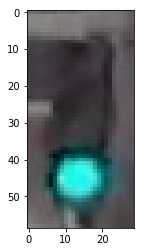

In [4]:
## TODO: Write code to display an image in IMAGE_LIST (try finding a yellow traffic light!)
## TODO: Print out 1. The shape of the image and 2. The image's label

# The first image in IMAGE_LIST is displayed below (without information about shape or label)
selected_image = IMAGE_LIST[1000][0]
plt.imshow(selected_image)

# 2. 预处理数据

每个图像中加载完成后，你必须使输入和输出标准化！

### 输入

这意味着每个输入图像都应采用相同的格式，大小相同等。我们将通过对每个图像执行相同的分析来创建特征，对于这样的分类任务，重要的是**类似的图像创建类似的特征**！

### 输出

我们还需要将输出结果作为易于阅读且易于与其他标签进行比较的标签。将“红灯”和“绿灯”等分类数据转换为数字数据，这是一种不错的做法。

一个非常常见的分类输出是一维列表，它是指分类数的长度：在红灯、黄灯和绿灯的情况下为3； 值为0或1表示某个图像是某一类。例如，由于我们有三个类（红灯、黄灯和绿灯），则可以按顺序列出一个列表：[红灯值，黄灯值，绿灯值]。一般来说，顺序无关紧要，在这种情况下，我们选择的顺序是[红灯值，黄灯值，绿灯值]，便于反映垂直顺序中每个灯的位置。

红灯的标签应该是：[1,0,0]，黄灯应该是：[0，1，0]，绿灯应该是：[0，0，1]。这些标签被称为**独热编码标签**。

*（注：使用 [机器学习算法 ](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)时，独热编码将尤为重要）。*

<img src="images/processing_steps.png" width="80%" height="80%">

---
<a id='task2'></a>
### （实现）：使输入图像标准化

* 将每个图像调整为所需的输入尺寸：32x32px。
* （可选）你也可以选择在此步骤中对图像进行裁剪、移动或旋转。

一种很常见的尺寸是可旋转的方形输入尺寸（且保持相同尺寸），并且以较小的方块进行分析。将所有图像制作成相同的尺寸，便于它们可以通过相同的分类器步骤进行发送，这一点也很重要！

In [5]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image and pre-process so that all "standard" images are the same size  
    standard_im = np.copy(image)
    standard_im = cv2.resize(standard_im, (32,32))
    
    return standard_im
    

## 标准化输出

对于每个加载的图像，我们还指定了预期的输出。为此，我们使用**独热编码**。

* 对标签进行独热编码。为此，请创建一个代表每类交通信号灯（红灯、黄灯、绿灯）的零数组，并将预期类别号的索引设置为1。

由于我们有三类（红灯、黄灯和绿灯）交通信号灯图像，我们已经强制使用了一个顺序：[红灯值，黄灯值，绿灯值]。对于独热编码，例如黄灯，我们首先将数组初始化为[0,0,0]，然后将中间值（黄灯值）更改为1：[0,1,0]。

---
<a id='task3'></a>
### （实现）：实现独热编码

In [6]:
## TODO: One hot encode an image label
## Given a label - "red", "green", or "yellow" - return a one-hot encoded label

# Examples: 
# one_hot_encode("red") should return: [1, 0, 0]
# one_hot_encode("yellow") should return: [0, 1, 0]
# one_hot_encode("green") should return: [0, 0, 1]

def one_hot_encode(label):
    
    ## TODO: Create a one-hot encoded label that works for all classes of traffic lights
    label_types = ['red', 'yellow', 'green']
    # Create a vector of 0's that is the length of the number of classes (3)
    one_hot_encoded = [0] * len(label_types)
    # Set the index of the class number to 1
    one_hot_encoded[label_types.index(label)] = 1 
    return one_hot_encoded


### 测试你的代码

在对这样的函数完成编程之后，对它进行测试并查看它是否能够产生预期的输出。**一般来说，编写代码之后，最好在小的功能块中测试这些代码**。这样，不仅可以确保你的代码在继续构建分类器时是正确的，而且你也可以尽早地发现错误，以免它们混合。

所有的测试代码都可以在文件`test_functions.py`中找到。如果你觉得有用的话，我们建议你查看该代码并添加自己的测试代码！

你会在上述文件夹中看到一个测试函数：`test_one_hot(self, one_hot_function)`，它会输入一个参数，一个one_hot_encode函数，并测试该函数的函数性。如果你的one_hot_label代码无法按预期工作，则此测试将输出一条错误消息，告诉你一些关于代码失败的原因。你的代码开始运行后，应该输出TEST PASSED。

In [7]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

# Test for one_hot_encode function
tests.test_one_hot(one_hot_encode)


**<span style="color: green;">TEST PASSED</span>**

## 构建一个输入图像并输出标签的`STANDARDIZED_LIST` 函数。

该函数会输入一个图像标签对列表，并输出一个已调整过大小的图像和独热编码标签的**标准化**列表。

这需要使用你在上面定义的那个函数来使输入和输出标准化，所以这些函数必须完整才能使完成这次标准化工作！

In [8]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        one_hot_label = one_hot_encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, one_hot_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## 将标准化数据可视化

显示来自STANDARDIZED_LIST的标准化图像，并将其与来自IMAGE_LIST的非标准化图像进行比较。请注意，它们的尺寸和外观是不同的！

Shape: (32, 32, 3)
Label: [0, 0, 1]


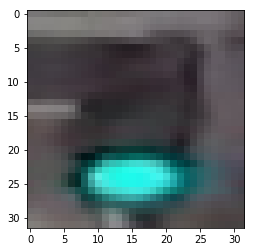

In [9]:
## TODO: Display a standardized image and its label
image_num = 1000
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label: " + str(selected_label))

# 3. 特征提取

现在，你需要根据颜色空间、形状分析和特征构建方面的现有知识来创建特征，帮助区分和分类三种类型的交通信号灯图像。

你需要创建至少**一项特征**（可选择创建更多特征）。必需的特征是**使用HSV颜色空间创建的亮度特征**：

1. 亮度特征。
    - 使用HSV颜色空间，创建一个特征，可用于帮你识别3种不同类别的交通信号灯。
    - 稍后，你需要回答一个问题，即你刚刚试图用哪些方法来识别交通信号灯。所以，当你浏览这个notebook 时，需要一直思考你要使用的方法：什么方法有效，什么方法不可行？

2. （可选）：创建更多特征！

是否要创建更多特征，这取决于你，但是你创建的特征应该能提高交通信号灯分类算法的准确度！有一点需要注意的是，要通过这个项目，**绝不能将任何一个红灯归类为绿灯**，因为这会对无人驾驶汽车造成严重的安全风险。为了避免这种错误分类，你可以考虑添加另一个特别区分红灯和绿灯的特征。

这些特征将会被合并在这个 notebook 的末尾处，从而形成一个完整的分类算法。

## 创建亮度特征 

创建亮度特征的方法有很多。亮度特征可以帮助你表示交通信号灯的图像特征。决定完成亮度特征创建的最佳步骤将由你来定。你应该随时查看并测试你的代码。

下图是一个用于创建亮度特征（从左到右：标准化图像、HSV彩色图像、裁剪图像、亮度特征）的示例步骤：

<img src="images/feature_ext_steps.png" width="70%" height="70%">


## RGB到HSV的转换

下面，将测试图像从RGB转换为HSV颜色空间，并将每个组件显示在图像中。

Label [red, yellow, green]: [1, 0, 0]


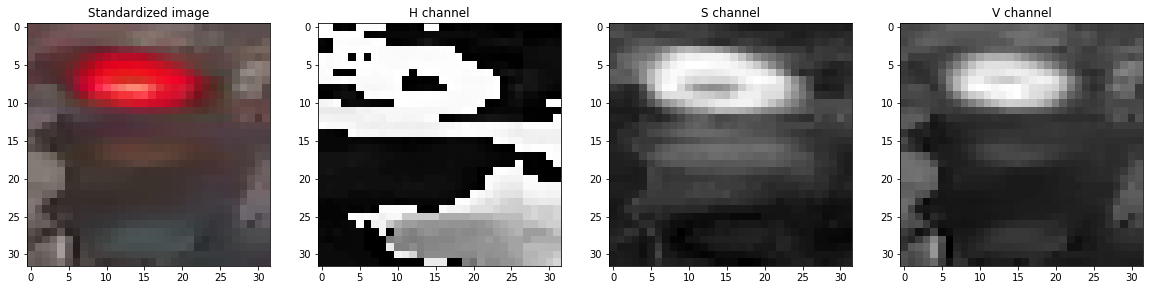

In [10]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label [red, yellow, green]: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')


---
<a id='task7'></a>
### （实现）：创建一个使用HSV颜色空间的亮度特征

编写一个函数，它会输入一张RGB图像并返回一个一维特征矢量和/或单值，这有助于对交通信号灯图像进行分类。唯一的要求是该函数应该应用HSV颜色空间转换，其余的由你来决定。

通过此函数，你应该能够判断一张图像的标签，并将其分类为红灯、绿灯或黄灯。如果辅助函数能够简化你的代码，你也可以定义几个辅助函数。

In [11]:
## TODO: Create a brightness feature that takes in an RGB image and outputs a feature vector and/or value
## This feature should use HSV colorspace values
def create_feature(rgb_image):
    """
    # 版本5: 根据审阅修改

    直接在原图片上取 三个灯的大致区域

    1.通过亮度总和来判断, (由于没有蒙版,所以相当于区域内的亮度平均值)
      - 当灯在原图片中的位置有较大偏移时,去除的区域包含部分背景,背景过亮导致判断错误, (主要是红\绿灯判断错误)

    2.通过亮度最大值来判断
      - 缺陷同上,且受到的影响更大

    """
    
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    v = hsv_image[:,:,2]
    s = hsv_image[:,:,1]
    
    # 规定区域, 由于图片中的红绿灯主体不一定在正间, 所以区域需要调整
    # 统一区域为 宽度w, 高度h的矩形 
    w = 20
    h = 8
    # 区域矩形 anchor左上角
    redAnchor = (6,4)
    yellowAnchor = (6,12)
    greenAnchor = (6,20)
    redRegion = v[redAnchor[1]:redAnchor[1]+h, redAnchor[0]:redAnchor[0]+w]
    yellowRegion = v[yellowAnchor[1]:yellowAnchor[1]+h, yellowAnchor[0]:yellowAnchor[0]+w]
    greenRegion = v[greenAnchor[1]:greenAnchor[1]+h, greenAnchor[0]:greenAnchor[0]+w]

    
    # 计算区域中的亮度 总和
    red_brightness = np.sum(redRegion)
    yellow_brightness = np.sum(yellowRegion)
    green_brightness = np.sum(greenRegion)
    
    feature = [red_brightness, yellow_brightness, green_brightness]
    predected_label = [0,0,0]
    predected_label[np.argmax(feature)] = 1
    
    return predected_label

## （可选）创建更多特征，用于帮助准确标记交通信号灯图像

In [ ]:
# (Optional) Add more image analysis and create more features


## （问题1）：你创建的特征如何帮你区分这3类交通信号灯图像？

**答案：**
在这个单元格中写下你的答案。

# 4. 进行分类，并将错误可视化

使用你创建的所有特征，编写一个可以输入一张RGB图像的函数，并使用提取的特征，输出一个灯光是红色、绿色或者黄色，并将该结果作为独热编码标签。这种分类函数应该能够对任何一张交通信灯图像进行分类！

我们建议你编写可能会用到的任何一种辅助函数或可视化代码，但为了测试准确度，请确保此`estimate_label`函数返回一个独热编码标签。

---
<a id='task8'></a>
### （实现）：构建一个完整的分类器

In [12]:
# This function should take in RGB image input
# Analyze that image using your feature creation code and output a one-hot encoded label
def estimate_label(rgb_image):
    
    ## TODO: Extract feature(s) from the RGB image and use those features to
    ## classify the image and output a one-hot encoded label
    predicted_label = create_feature(rgb_image)
    
    return predicted_label
    

## 测试分类器

这里，我们使用这个 notebook 开始部分的测试数据集，对你的分类算法进行测试！编写完了一个“好”的分类器后，这个项目就算是完整的。

在这种案例中，一个“好”的分类器应符合以下标准（只要符合，就可以随时提交你的项目）：
1. 分类准确度达到90％以上。
2. 切勿将任何一个红灯归类为绿灯。

### 测试数据集

在下面，我们首先加载测试数据集，然后使用上面定义的`standardize`函数对其进行标准化，然后对其进行**混洗**；这样可以确保顺序不会对准确度测试造成影响。

In [13]:
# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## 确定准确度

将你的分类算法（也称为“模型”）的输出与真实标签进行比较并确定准确度。

此代码将所有错误分类的图像、其预测标签以及它们的真实标签存储在名为`MISCLASSIFIED`的列表中。此代码用于测试，*不应更改*。

In [14]:
# Constructs a list of misclassified images given a list of test images and their labels
# This will throw an AssertionError if labels are not standardized (one-hot encoded)

def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))


Accuracy: 0.9629629629629629
Number of misclassified images = 11 out of 297


---
<a id='task9'></a>
### 将错误分类的图像可视化

将分类错误的一些图像（在`MISCLASSIFIED`列表中）可视化，并注意那些难以使它们归类的任何一个特征。这样做可以帮助你识别分类算法中的缺陷。

0 predicted_label [1, 0, 0] true_label [0, 0, 1]
1 predicted_label [1, 0, 0] true_label [0, 0, 1]
2 predicted_label [1, 0, 0] true_label [0, 0, 1]
3 predicted_label [1, 0, 0] true_label [0, 0, 1]
4 predicted_label [1, 0, 0] true_label [0, 0, 1]
5 predicted_label [1, 0, 0] true_label [0, 0, 1]
6 predicted_label [1, 0, 0] true_label [0, 0, 1]
7 predicted_label [1, 0, 0] true_label [0, 0, 1]
8 predicted_label [1, 0, 0] true_label [0, 0, 1]
9 predicted_label [1, 0, 0] true_label [0, 0, 1]
10 predicted_label [1, 0, 0] true_label [0, 0, 1]


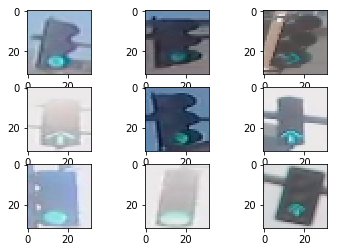

In [15]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as

for i in range(len(MISCLASSIFIED)):
    print(i, "predicted_label", MISCLASSIFIED[i][1], "true_label", MISCLASSIFIED[i][2])
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(MISCLASSIFIED[i][0])

---
<a id='question2'></a>
## （问题2）：在将这些误分类可视化之后，你认为你的分类算法存在哪些缺陷？请至少发现两个缺陷。

**答案：** 在这个单元格中写下你的答案。

1. 只靠颜色来区分像素。有部分图片有很大色差，判断错误的图片大部分是因为图片偏白，导致没有检测到三种颜色的像素，因此被判断为红灯。
2. 特征不够多。特征只有三种颜色的像素占比，结果容易受到影响。

## 测试你是否将某一个红灯归类为绿灯

**要通过这个项目，你不能将任何一个红灯归类为绿灯！**将红灯分类为绿灯会将导致汽车出现闯红灯行驶的情况，因此这种“把红灯误看做是绿灯”的错误在现实世界中非常危险。

下面的代码可以让你测试是否将测试集中的任何一个红灯错误归类为绿灯。**这个测试假定 `MISCLASSIFIED` 是一个元组列表，其顺序是： [misclassified_image, predicted_label, true_label]** 。

注：这不是一个全面的测试，但它是一个很好的指标。如果你通过了这个测试，说明你已经掌握了这部分知识！这个测试会遍历错误分类的例子列表，并检查是否存在任何一个红灯被错误标记为[0,1,0]（绿灯）的情况。

In [16]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

if(len(MISCLASSIFIED) > 0):
    # Test code for one_hot_encode function
    tests.test_red_as_green(MISCLASSIFIED)
else:
    print("MISCLASSIFIED may not have been populated with images.")


**<span style="color: green;">TEST PASSED</span>**

# 5. 改进你的算法！

**完成所有任务并且符合以下两个标准，并回答完所有问题后，请提交你的项目：**
1. 分类准确度超过90％；
2. 没有将任何一个红灯归类为绿灯。

如果不符合这两个要求（这在第一次尝试中很常见！），请重新查看你的算法并对其进行改进，改善光线识别 - 这可能意味着更改亮度特征，执行一些背景减除或添加其他特征！

---

### 接受进一步挑战（可选性挑战项目）

如果你发现这个挑战项目太过容易，我建议你去挑战一些更有难度的项目！ 这里有几个**可选** 项目（意思是说，执行下面这些项目后，你不需要进行提交，也不需要必须通过这些项目）：
* （可选）尽可能使分类准确度> 95％。
* （可选）图像中的一些灯是带形状的，eg：箭头形状；尝试在区分灯的颜色以外，进一步将灯光的形状建模得到分类结果，圆形或箭头形。
* （可选）添加另一个特征，尽可能使准确度接近100％！


# 版本6

## create_feature2, 建立蒙版

## 蒙版后的区域内的亮度
- 计算平均亮度(亮度总和/未被蒙住的像素数量)可能出现情况: 大部分亮度低的地方被蒙住, 但是留有的背景的亮度比较高, 计算平均亮度反而更加高
  - 解决方案: sum_pixs计算像素数量时, 如果像素数少于一定值, 则返回一个比较大的值, 可以避免噪点的干扰

- 创建蒙版时,调整阀值

  ```
  Accuracy: 0.9764309764309764
  Number of misclassified images = 7 out of 297
  ```


In [17]:
# blur
# http://setosa.io/ev/image-kernels/
def blur(image):
    blur_kernel = np.array([[ 0.0625, 0.125, 0.0625], 
                   [ 0.125, 0.25, 0.125], 
                   [ 0.0625, 0.125, 0.0625]])
    blur_image = cv2.filter2D(image, -1, blur_kernel)
    # plt.imshow(blur_image)
    # plt.title("blur_image")
    # plt.show()
    return blur_image

In [18]:
# 创建蒙版 明度(v)

def create_v_mask(rgb_image):
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(hsv_image[4:-4,6:-6,1])
    area = 32*32
    v = int(sum_brightness/area * 2)
    
    v_lower = np.array([0,0,0])
    v_upper = np.array([179,255,v])
    v_mask = cv2.inRange(hsv_image, v_lower, v_upper)
    return v_mask

In [20]:
# 创建蒙版 饱和度(s)

def create_s_mask(rgb_image):
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    sum_s = np.sum(hsv_image[:,:,1])
    area = 32*32
    s = int(sum_s/area * 0.7)
    
    s_lower = np.array([0,0,0])
    s_upper = np.array([179,s,255])
    s_mask = cv2.inRange(hsv_image, s_lower, s_upper)
    return s_mask

In [21]:
def create_mask(rgb_image):
    v_mask = create_v_mask(rgb_image)
    s_mask = create_s_mask(rgb_image)
    mask = cv2.bitwise_or(v_mask, s_mask)

    # 膨胀操作
    kernel = np.ones((2, 2), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=1)
#     # 腐蚀操作
#     kernel = np.ones((2, 2), np.uint8)
#     mask = cv2.erode(mask, kernel, iterations=1)
    return mask

In [22]:
# 计算区域内未被遮盖的像素数
def sum_pixs(region):
    # 二值化
    ret, binary = cv2.threshold(region, 1, 255, cv2.THRESH_BINARY)
    
    
    if np.sum(binary)/255 == 0:
        return 20*8
    elif np.sum(binary)/255 < 16:  # 避免噪点或边缘背景, 导致亮度平均值过高
        return 20*8
    else:
        return np.sum(binary)/255

In [23]:
def create_feature2(rgb_image, show=0):
    
    blur_image = blur(rgb_image)
    mask = create_mask(blur_image)

#     mask = create_mask(rgb_image)
    
    # 遮盖图像
    masked_image = np.copy(rgb_image)
    masked_image[mask != 0] = [0, 0, 0]
    
    hsv_image = cv2.cvtColor(masked_image, cv2.COLOR_RGB2HSV)

    v = hsv_image[:,:,2]
    
    # 规定区域, 由于图片中的红绿灯主体不一定在正间, 所以区域需要调整
    # 统一区域为 宽度w, 高度h的矩形 
    w = 20
    h = 8
    # anchor左上角
    redAnchor = (6,4)
    yellowAnchor = (6,12)
    greenAnchor = (6,20)
    redRegion = v[redAnchor[1]:redAnchor[1]+h, redAnchor[0]:redAnchor[0]+w]
    yellowRegion = v[yellowAnchor[1]:yellowAnchor[1]+h, yellowAnchor[0]:yellowAnchor[0]+w]
    greenRegion = v[greenAnchor[1]:greenAnchor[1]+h, greenAnchor[0]:greenAnchor[0]+w]

    
    # 计算区域中的亮度 总和
    red_brightness = np.sum(redRegion)
    yellow_brightness = np.sum(yellowRegion)
    green_brightness = np.sum(greenRegion)
    
    feature = [red_brightness, yellow_brightness, green_brightness]
    predected_label = [0,0,0]
    predected_label[np.argmax(feature)] = 1
    
    
    # 计算区域中的亮度 总和/像素数
    red_brightness_avg = np.sum(redRegion) / sum_pixs(redRegion)
    yellow_brightness_avg = np.sum(yellowRegion) / sum_pixs(yellowRegion)
    green_brightness_avg = np.sum(greenRegion) / sum_pixs(greenRegion)
    
    feature2 = [red_brightness_avg, yellow_brightness_avg, green_brightness_avg]
    predected_label2 = [0,0,0]
    predected_label2[np.argmax(feature2)] = 1

    # 测试用, 显示参数和图片
    if show == 1:
        print("feature 总和: ", feature)
        print("feature2 总和/像素数: ",feature2)
        print("sum_pixs: ",[sum_pixs(redRegion),sum_pixs(yellowRegion),sum_pixs(greenRegion)])
        
        # 画出划定的范围, 注意画图坐标和切片不一样
        region = rgb_image.copy()
        region = cv2.rectangle(region, redAnchor, (redAnchor[0]+w, redAnchor[1]+h), (255, 0, 0), 1)
        region = cv2.rectangle(region, yellowAnchor, (yellowAnchor[0]+w, yellowAnchor[1]+h), (255, 255,0), 1)
        region = cv2.rectangle(region, greenAnchor, (greenAnchor[0]+w, greenAnchor[1]+h), (0, 255, 0), 1)
        
        f, axs = plt.subplots(2, 4, figsize=(20,8))
        ax0 = axs[0,0]
        ax0.imshow(rgb_image)
        ax0.set_title("rgb_image")
        ax1 = axs[0,1]
        ax1.imshow(region)
        ax1.set_title("region")
        ax2 = axs[0,2]
        ax2.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)[:,:,2], cmap='gray')
        ax2.set_title("masked_v")
        ax3 = axs[0,3]
        ax3.bar(['r', 'y', 'g'], feature)
        ax3.set_title("sum of brightness")
        
        ax4 = axs[1,0]
        ax4.imshow(redRegion, cmap='gray')
        ax4.set_title("redRegion")
        ax5 = axs[1,1]
        ax5.imshow(yellowRegion, cmap='gray')
        ax5.set_title("yellowAnchor")
        ax6 = axs[1,2]
        ax6.imshow(greenRegion, cmap='gray')
        ax6.set_title("greenRegion")
        ax7 = axs[1,3]
        ax7.bar(['r', 'y', 'g'], feature2)
        ax7.set_title("avg of brightness")
    
    
    return predected_label2

In [24]:
def estimate_label2(rgb_image):
    predicted_label = create_feature2(rgb_image) 
    return predicted_label 


def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier
        predicted_label = estimate_label2(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.9764309764309764
Number of misclassified images = 7 out of 297


In [25]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

if(len(MISCLASSIFIED) > 0):
    # Test code for one_hot_encode function
    tests.test_red_as_green(MISCLASSIFIED)
else:
    print("MISCLASSIFIED may not have been populated with images.")


**<span style="color: green;">TEST PASSED</span>**

0 predicted_label [0, 0, 1] true_label [0, 1, 0]
1 predicted_label [1, 0, 0] true_label [0, 0, 1]
2 predicted_label [1, 0, 0] true_label [0, 0, 1]
3 predicted_label [1, 0, 0] true_label [0, 0, 1]
4 predicted_label [1, 0, 0] true_label [0, 0, 1]
5 predicted_label [0, 1, 0] true_label [1, 0, 0]
6 predicted_label [0, 1, 0] true_label [1, 0, 0]


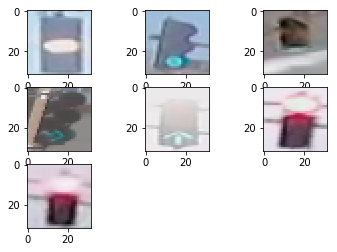

In [26]:
for i in range(len(MISCLASSIFIED)):
    print(i, "predicted_label", MISCLASSIFIED[i][1], "true_label", MISCLASSIFIED[i][2])
for i in range(7):
    plt.subplot(331+i)
    plt.imshow(MISCLASSIFIED[i][0])

feature 总和:  [8790, 4011, 6899]
feature2 总和/像素数:  [108.51851851851852, 100.27500000000001, 98.557142857142864]
sum_pixs:  [81.0, 40.0, 70.0]


[1, 0, 0]

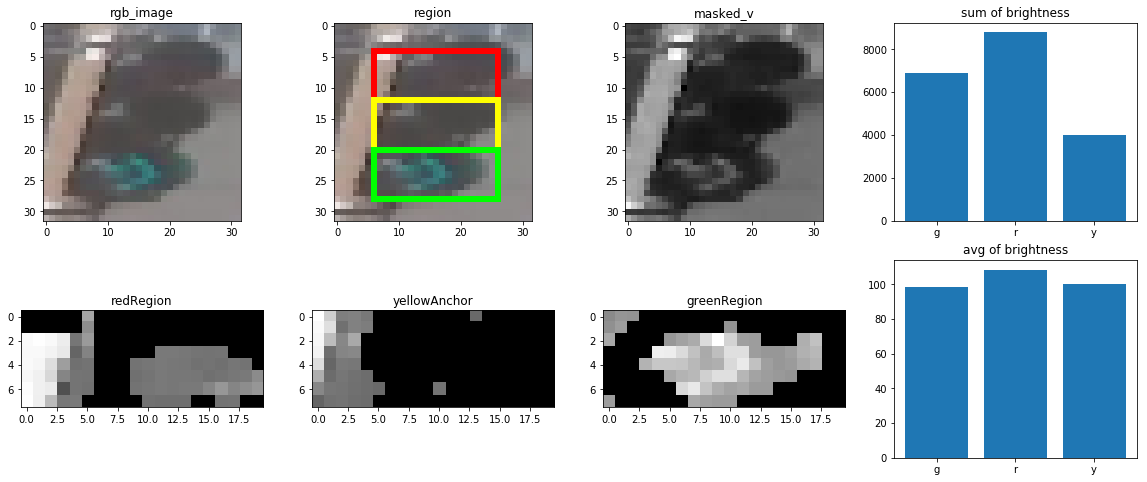

In [28]:
i = 3
create_feature2(MISCLASSIFIED[i][0], show=1)